In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Load the data
file_path = r'C:\Users\Asus TUF\Downloads\all_stocks_5yr.csv'
df = pd.read_csv(file_path)

In [38]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [39]:
# Check for missing values
print(df.isnull().sum())

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [40]:
df = df.dropna()
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [42]:
df = df.drop(['Name'], axis=1)

In [44]:
df = df.drop(['date'], axis=1)

In [45]:
# Define X (Features) and Y (Target)
X = df.drop(['close'], axis=1)
Y = df['close']

In [50]:
X

,open,high,low,volume
0,15.07,15.12,14.63,8407500
1,14.89,15.01,14.26,8882000
2,14.45,14.51,14.10,8126000
3,14.30,14.94,14.25,10259500
4,14.94,14.96,13.16,31879900
...,...,...,...,...
619035,76.84,78.27,76.69,2982259
619036,77.53,78.12,76.73,2595187
619037,76.64,76.92,73.18,2962031
619038,72.74,74.56,72.13,4924323


In [46]:
from sklearn.model_selection import train_test_split
# Split Data into Training & Testing Sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
# Train Model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make Predictions
predictions = model.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate performance
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.33934617231605524
Mean Squared Error: 0.4696843880793043
Root Mean Squared Error: 0.6853352377335521
R-squared: 0.9999510268024236


C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_20032\1881626121.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--k', color='red')  # Line of perfect prediction


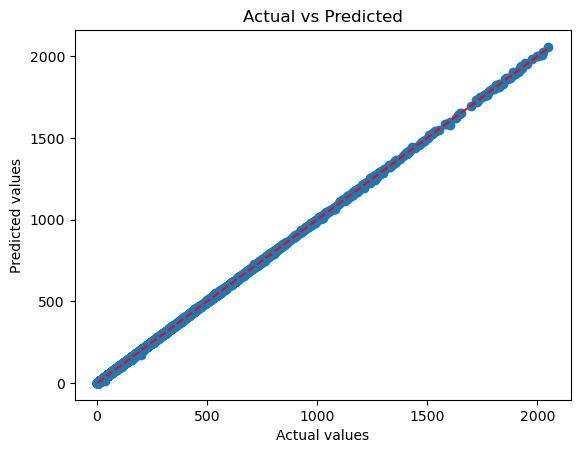

In [49]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.scatter(Y_test, predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--k', color='red')  # Line of perfect prediction
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.show()